In [3]:
# Step 1: Set Up the Environment
# Ensure you have the necessary Python libraries installed
# Run this in your terminal or in a Jupyter Notebook cell

# Step 2: Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

# Step 3: Download Historical Data
start_date = '2020-01-01'
end_date = '2023-01-01'
stock1 = 'AAPL'
stock2 = 'MSFT'

data1 = yf.download(stock1, start=start_date, end=end_date)['Adj Close']
data2 = yf.download(stock2, start=start_date, end=end_date)['Adj Close']

data = pd.DataFrame({stock1: data1, stock2: data2}).dropna()

data.head()

Matplotlib is building the font cache; this may take a moment.
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT
Date,,
2020-01-02,72.960472,154.215652
2020-01-03,72.251129,152.295441
2020-01-06,72.826866,152.689056
2020-01-07,72.484337,151.296890
2020-01-08,73.650345,153.706787


In [4]:
data = data.pct_change()
data.head()

,AAPL,MSFT
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.012451
2020-01-06,0.007969,0.002585
2020-01-07,-0.004703,-0.009118
2020-01-08,0.016086,0.015928


In [10]:
data['corr'] = data['AAPL'].rolling(window=30).corr(data['MSFT'])
data.head(31)

,AAPL,MSFT,corr
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012451,NaN
2020-01-06,0.007969,0.002585,NaN
2020-01-07,-0.004703,-0.009118,NaN
2020-01-08,0.016086,0.015928,NaN
2020-01-09,0.021241,0.012493,NaN
2020-01-10,0.002261,-0.004627,NaN
2020-01-13,0.021364,0.012024,NaN
2020-01-14,-0.013503,-0.007043,NaN


<Axes: xlabel='Date', ylabel='corr'>

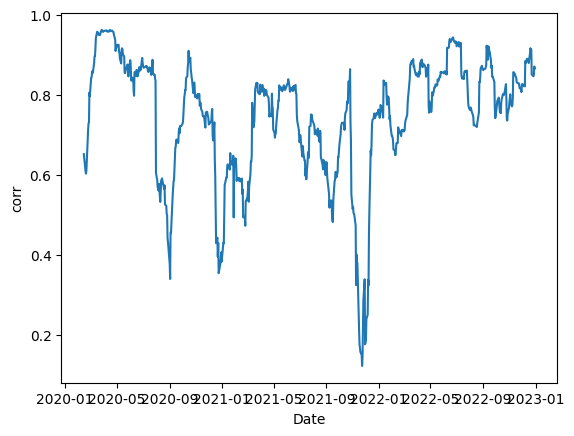

In [14]:
import seaborn as sns
sns.lineplot(data['corr'])

In [23]:
data['Spread'] = data[stock1] - data[stock2]
data['Z-score'] = (data['Spread'] - data['Spread'].rolling(30).mean()) / data['Spread'].rolling(30).std()
data['Spread'].rolling(30).mean()[29]


/var/folders/48/k67vwzh91m730gsww79dstgc0000gn/T/ipykernel_63168/276626928.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Spread'].rolling(30).mean()[29]


nan

In [16]:
data.head(40)

,AAPL,MSFT,corr,Spread,Z-score
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012451,NaN,0.002729,NaN
2020-01-06,0.007969,0.002585,NaN,0.005384,NaN
2020-01-07,-0.004703,-0.009118,NaN,0.004414,NaN
2020-01-08,0.016086,0.015928,NaN,0.000158,NaN
2020-01-09,0.021241,0.012493,NaN,0.008748,NaN
2020-01-10,0.002261,-0.004627,NaN,0.006888,NaN
2020-01-13,0.021364,0.012024,NaN,0.009340,NaN
2020-01-14,-0.013503,-0.007043,NaN,-0.006460,NaN


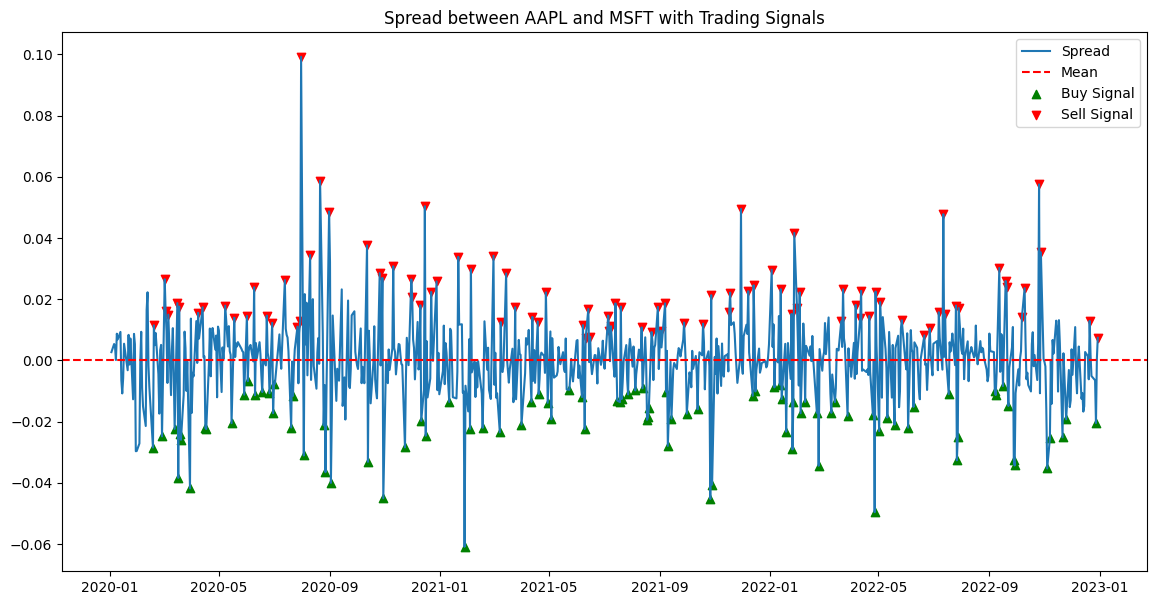

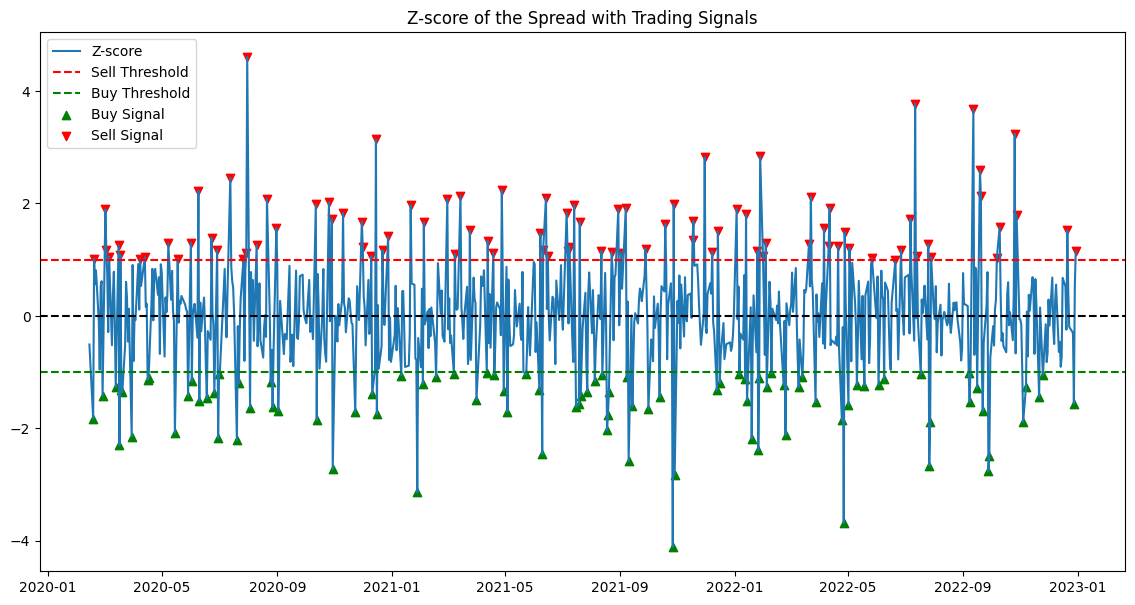

In [18]:
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Spread between AAPL and MSFT with Trading Signals')
plt.legend()
plt.show()

# Plot the z-score with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-score'], label='Z-score')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Sell Threshold')
plt.axhline(-1, color='green', linestyle='--', label='Buy Threshold')
plt.scatter(data.index[data['Long'] == 1], data['Z-score'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Z-score'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Z-score of the Spread with Trading Signals')
plt.legend()
plt.show()


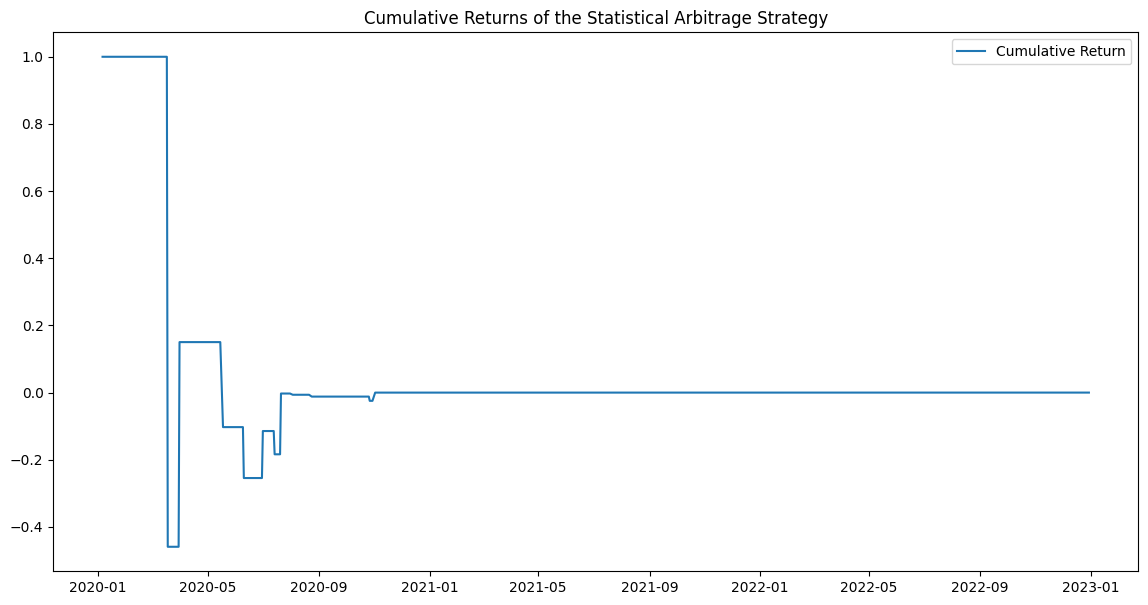

In [20]:
data['Position'] = np.where(data['Z-score'] > 2, -1, np.where(data['Z-score'] < -2, 1, 0))

# Calculate the daily returns
data['Return'] = data['Spread'].pct_change() * data['Position'].shift()

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Statistical Arbitrage Strategy')
plt.legend()
plt.show()
